In [45]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()


In [47]:
df= pd.read_csv(r'C:\Users\divaa\OneDrive\Desktop\pri\fcc-forum-pageviews.csv',index_col='date',parse_dates=True)
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [49]:
df= df.loc[(df['value']>=df['value'].quantile(0.025))& (df['value']<=df['value'].quantile(0.975))]
df.head()

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


In [51]:
df.head()

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


In [55]:
df_bar=df.copy()
df_bar['month']=pd.DatetimeIndex(df_bar.index).month
df_bar['year']=pd.DatetimeIndex(df_bar.index).year
df_bar=df_bar.groupby(['year','month'])['value'].mean()
df_bar=df_bar.unstack()
df_bar.columns=['Jan','Feb','Mar','Apr','May','Jun','July','Aug','Sep','Oct','Nov','Dec']

df_bar

,Jan,Feb,Mar,Apr,May,Jun,July,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


In [57]:
df_box=df.copy().reset_index()
df_box['year']=[d.year for d in df_box.date]
df_box['month']=[d.strftime('%b') for d in df_box.date]
df_box

,date,value,year,month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May
3,2016-05-28,19044,2016,May
4,2016-05-29,20325,2016,May
...,...,...,...,...
1233,2019-11-24,138875,2019,Nov
1234,2019-11-29,171584,2019,Nov
1235,2019-11-30,141161,2019,Nov
1236,2019-12-01,142918,2019,Dec


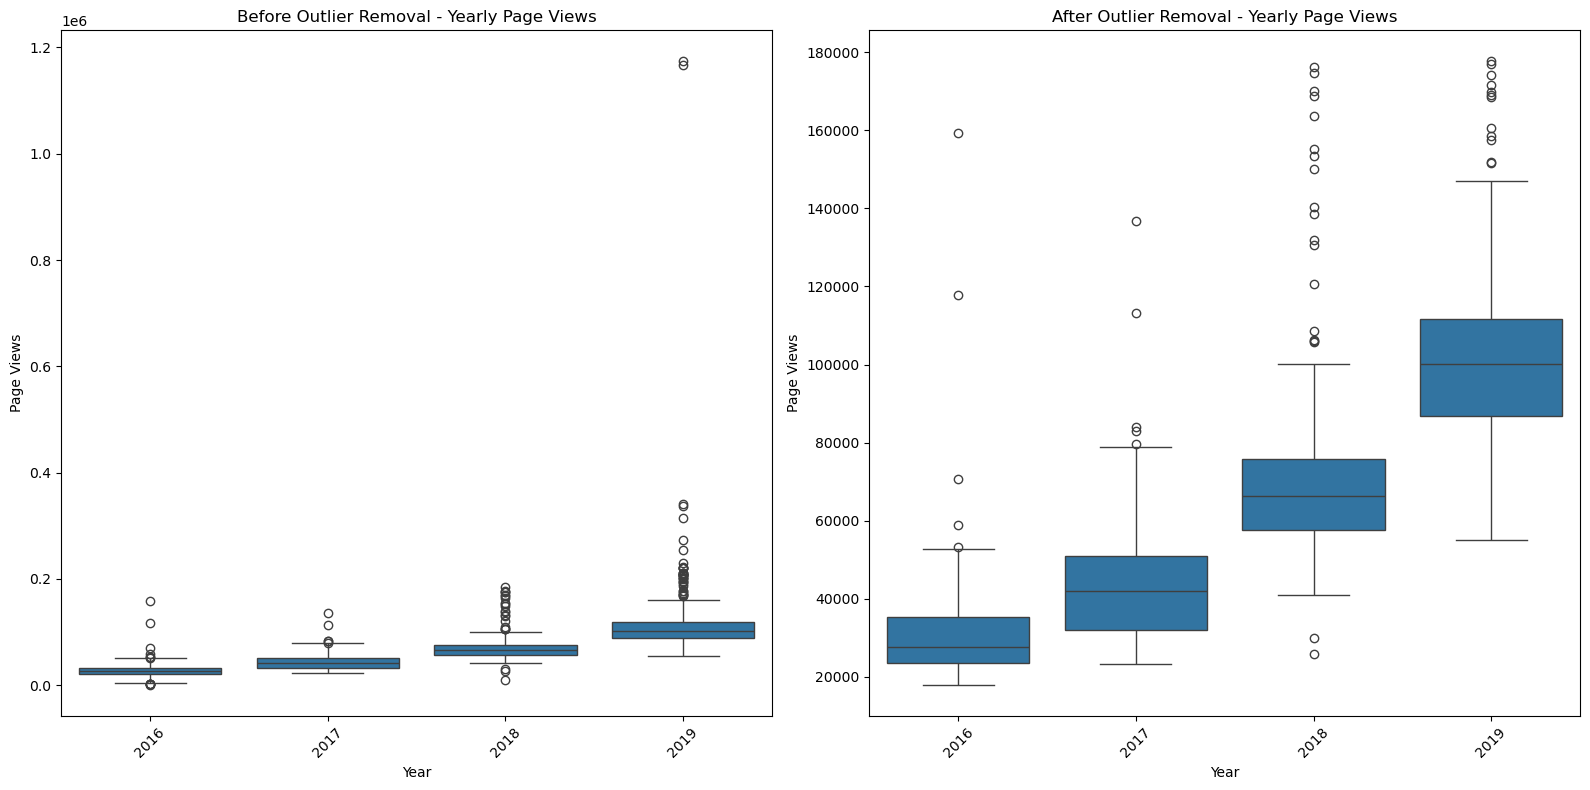

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r'C:\Users\divaa\OneDrive\Desktop\pri\fcc-forum-pageviews.csv', index_col='date', parse_dates=True)

# ====================== BEFORE OUTLIER REMOVAL ==========================
df_box_before = df.copy().reset_index()
df_box_before['year'] = df_box_before['date'].dt.year
df_box_before['month'] = df_box_before['date'].dt.strftime('%b')  # Month name

# ====================== AFTER OUTLIER REMOVAL ==========================
df_cleaned = df.loc[
    (df['value'] >= df['value'].quantile(0.025)) &
    (df['value'] <= df['value'].quantile(0.975))
]
df_box_after = df_cleaned.copy().reset_index()
df_box_after['year'] = df_box_after['date'].dt.year
df_box_after['month'] = df_box_after['date'].dt.strftime('%b')

# =================== PLOT THE BOX PLOTS FOR COMPARISON ===================
plt.figure(figsize=(16, 8))

# Subplot 1: Box Plot before Outlier Removal
plt.subplot(1, 2, 1)
sns.boxplot(x='year', y='value', data=df_box_before)
plt.title('Before Outlier Removal - Yearly Page Views')
plt.xlabel('Year')
plt.ylabel('Page Views')
plt.xticks(rotation=45)

# Subplot 2: Box Plot after Outlier Removal
plt.subplot(1, 2, 2)
sns.boxplot(x='year', y='value', data=df_box_after)
plt.title('After Outlier Removal - Yearly Page Views')
plt.xlabel('Year')
plt.ylabel('Page Views')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


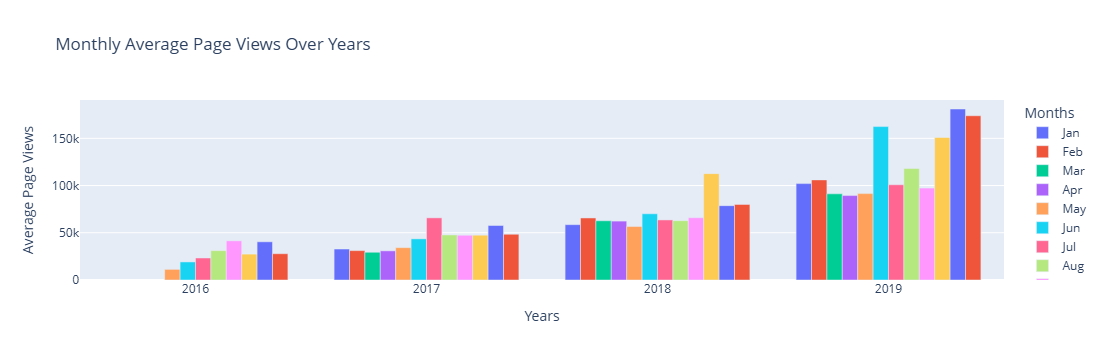

In [61]:
import pandas as pd
import plotly.express as px

# Copy the original data
df_bar = df.copy()

# Extract month and year for grouping
df_bar['month'] = pd.DatetimeIndex(df_bar.index).month
df_bar['year'] = pd.DatetimeIndex(df_bar.index).year

# Group by 'year' and 'month', then calculate average page views
df_bar_grouped = df_bar.groupby(['year', 'month'])['value'].mean()

# Unstack the data: months become columns, years remain index
df_bar_unstacked = df_bar_grouped.unstack()

# Rename months for better readability
df_bar_unstacked.columns = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                            'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Reset index and melt the data for visualization (long format)
df_bar_reset = df_bar_unstacked.reset_index().melt(id_vars='year', 
                                                   var_name='Month', 
                                                   value_name='Average Page Views')

# Create a grouped bar chart using Plotly
fig = px.bar(df_bar_reset, 
             x='year', 
             y='Average Page Views', 
             color='Month', 
             labels={'year': 'Years', 'Average Page Views': 'Average Page Views', 'Month': 'Months'},
             title='Monthly Average Page Views Over Years',
             barmode='group')  # 'group' mode shows bars side by side

# Show the chart
fig.show()


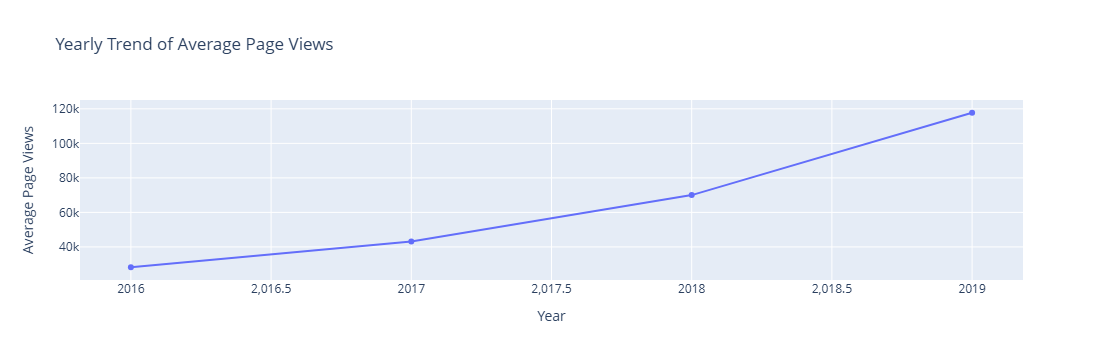

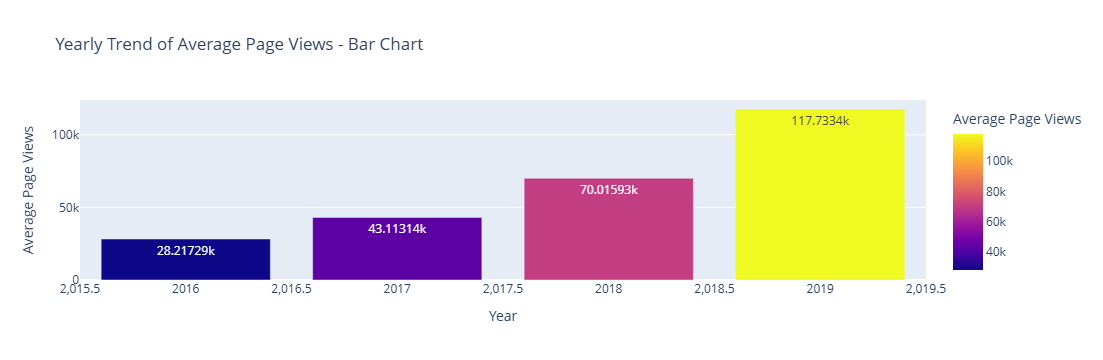

In [63]:
import pandas as pd
import plotly.express as px

# Copy the original data
df_yearly = df.copy()

# Extract the year from the index
df_yearly['year'] = pd.DatetimeIndex(df_yearly.index).year

# Group by 'year' to calculate average page views per year
yearly_avg = df_yearly.groupby('year')['value'].mean().reset_index()

# Create a line chart for yearly trend using Plotly Express
fig = px.line(yearly_avg, 
              x='year', 
              y='value',
              markers=True,  # Add data points as markers on the line
              labels={'year': 'Year', 'value': 'Average Page Views'},
              title='Yearly Trend of Average Page Views')

# Show the chart
fig.show()

# Optionally, create a bar chart for the same data
fig_bar = px.bar(yearly_avg,
                 x='year',
                 y='value',
                 labels={'year': 'Year', 'value': 'Average Page Views'},
                 title='Yearly Trend of Average Page Views - Bar Chart',
                 color='value',  # Use value for color scaling
                 text_auto=True)  # Add text labels on bars

# Show bar chart
fig_bar.show()


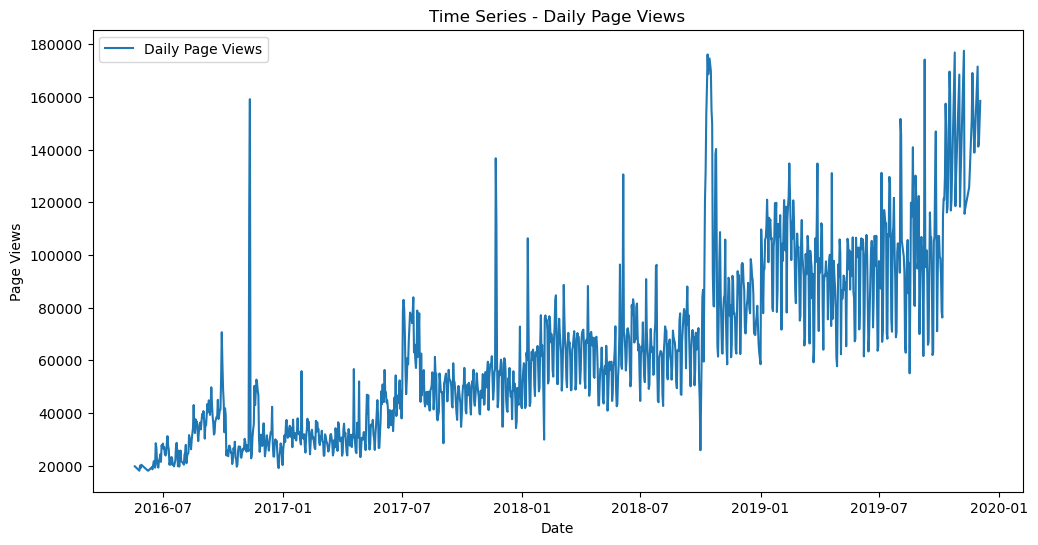

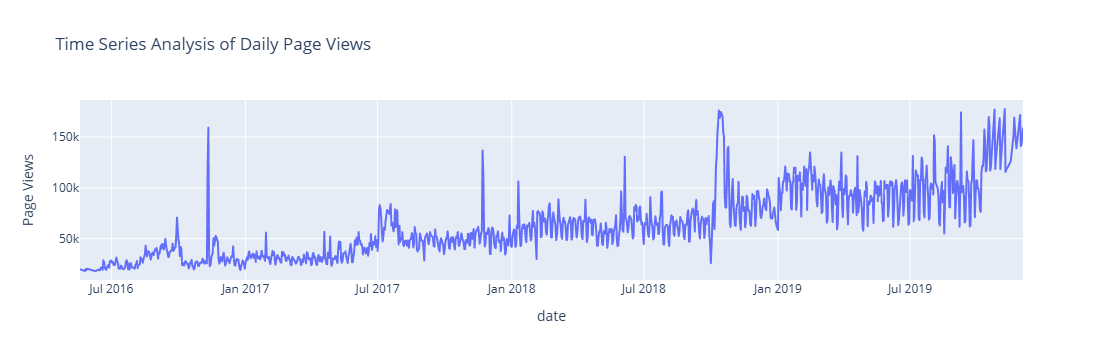

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.api as sm
import seaborn as sns

# Step 1: Read the Dataset
df_ts = pd.read_csv(r'C:\Users\divaa\OneDrive\Desktop\pri\fcc-forum-pageviews.csv',
                    index_col='date', parse_dates=True)

# Step 2: Clean Data by Removing Outliers
df_cleaned = df_ts.loc[(df_ts['value'] >= df_ts['value'].quantile(0.025)) & 
                       (df_ts['value'] <= df_ts['value'].quantile(0.975))]

# Step 3: Plot the Raw Time Series
plt.figure(figsize=(12, 6))
plt.plot(df_cleaned.index, df_cleaned['value'], label='Daily Page Views', color='tab:blue')
plt.title('Time Series - Daily Page Views')
plt.xlabel('Date')
plt.ylabel('Page Views')
plt.legend()
plt.show()

# Step 4: Interactive Time Series Plot Using Plotly
fig = px.line(df_cleaned, 
              x=df_cleaned.index, 
              y='value', 
              title='Time Series Analysis of Daily Page Views',
              labels={'value': 'Page Views', 'index': 'Date'})
fig.show()



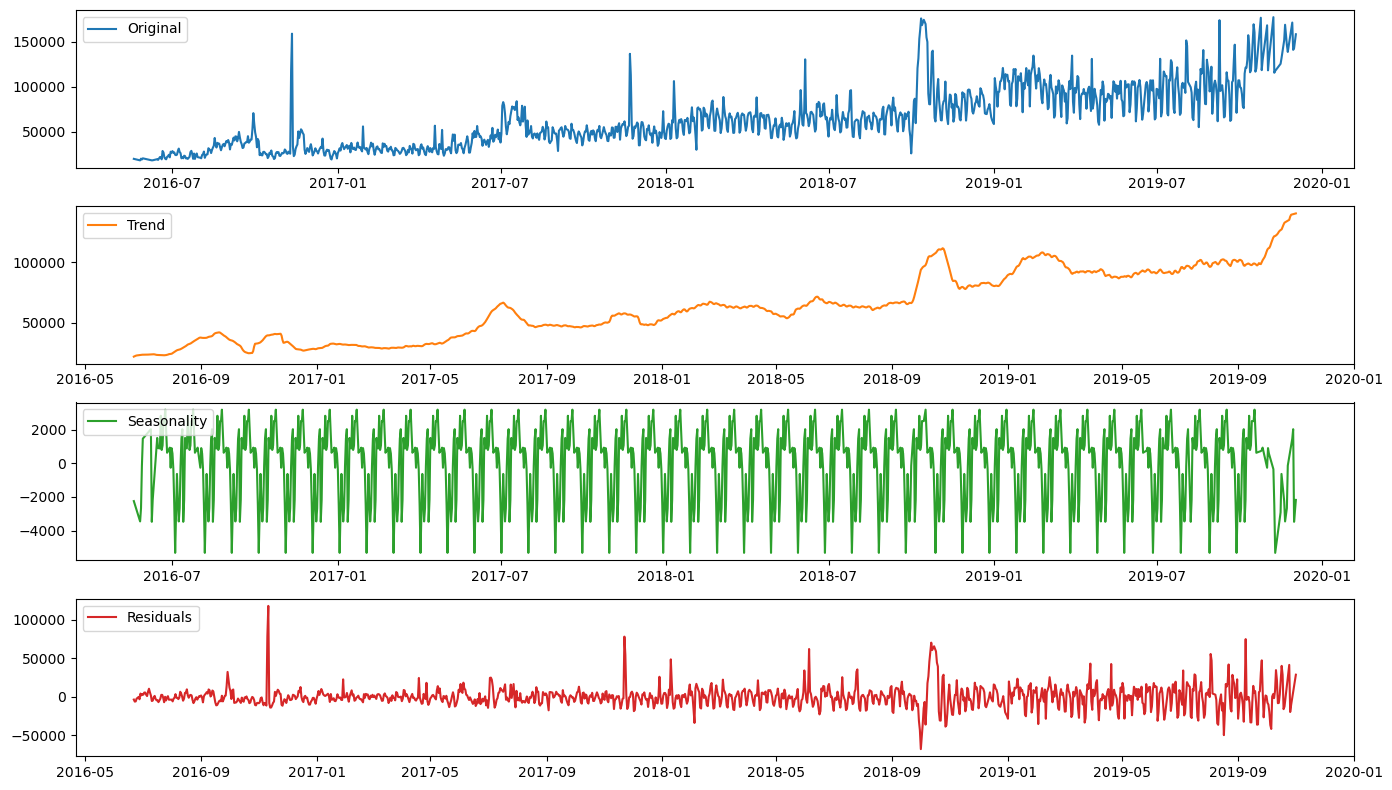

In [39]:
# Step 5: Decomposition of the Time Series (Trend, Seasonality, Residuals)
decomposition = sm.tsa.seasonal_decompose(df_cleaned['value'], model='additive', period=30)

# Plot the decomposed components
plt.figure(figsize=(14, 8))

plt.subplot(411)
plt.plot(df_cleaned['value'], label='Original')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='tab:orange')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality', color='tab:green')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals', color='tab:red')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


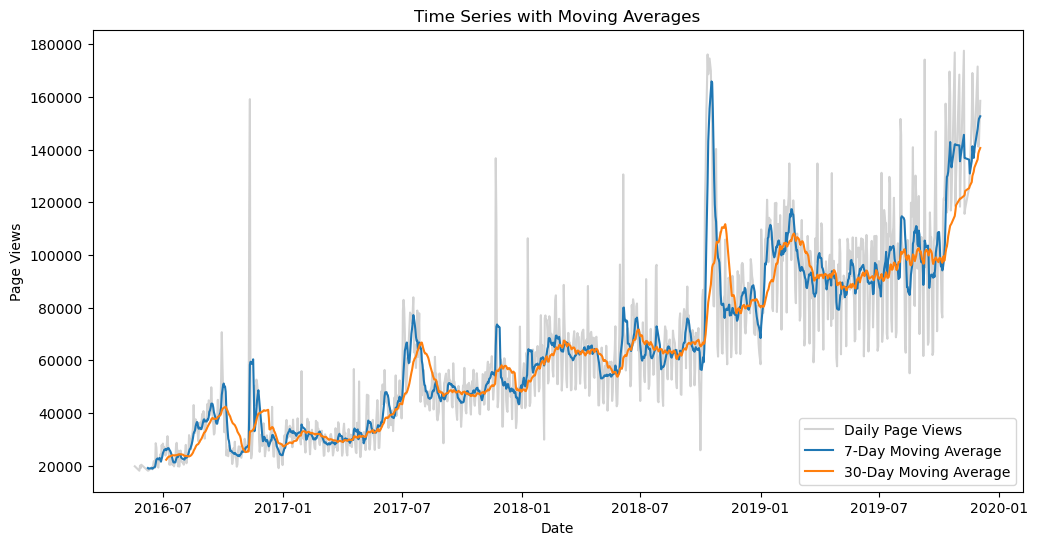

In [43]:
# Step 6: Rolling Average (Smoothing Out the Fluctuations)
df_cleaned = df_cleaned.copy()  # Create an explicit copy
df_cleaned['7-day MA'] = df_cleaned['value'].rolling(window=7).mean()
df_cleaned['30-day MA'] = df_cleaned['value'].rolling(window=30).mean()

# Plot with Rolling Averages
plt.figure(figsize=(12, 6))
plt.plot(df_cleaned.index, df_cleaned['value'], label='Daily Page Views', color='lightgray')
plt.plot(df_cleaned['7-day MA'], label='7-Day Moving Average', color='tab:blue')
plt.plot(df_cleaned['30-day MA'], label='30-Day Moving Average', color='tab:orange')
plt.title('Time Series with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Page Views')
plt.legend()
plt.show()


In [3]:
from IPython.display import Markdown, display

# Define the insights as a Markdown string
insights = """
# Insights: Time Series with Moving Averages

### Interpretation:

- **Daily Page Views (Gray line):**
  - Represents the raw data for the number of page views recorded daily.
  - It is noisy with many fluctuations, indicating variations in page views on a day-to-day basis.

- **7-Day Moving Average (Blue line):**
  - Smoothens the daily page view data by taking the average of the last 7 days for each data point.
  - This provides short-term trends while reducing the noise from daily variations.

- **30-Day Moving Average (Orange line):**
  - Smoothens the data further by averaging over the last 30 days.
  - This line highlights longer-term trends and minimizes short-term fluctuations.

### Key Insights:

- There are periodic spikes and troughs in daily page views, which are dampened in the moving averages.
- The **7-day moving average** closely follows the daily data but smooths it to make trends more visible.
- The **30-day moving average** highlights broader trends, showing an overall increase in page views over time.
- Specific periods (e.g., late 2018 and early 2019) exhibit significant peaks, which may correspond to events or campaigns driving traffic.

"""
display(Markdown(insights))



# Insights: Time Series with Moving Averages

### Interpretation:

- **Daily Page Views (Gray line):**
  - Represents the raw data for the number of page views recorded daily.
  - It is noisy with many fluctuations, indicating variations in page views on a day-to-day basis.

- **7-Day Moving Average (Blue line):**
  - Smoothens the daily page view data by taking the average of the last 7 days for each data point.
  - This provides short-term trends while reducing the noise from daily variations.

- **30-Day Moving Average (Orange line):**
  - Smoothens the data further by averaging over the last 30 days.
  - This line highlights longer-term trends and minimizes short-term fluctuations.

### Key Insights:

- There are periodic spikes and troughs in daily page views, which are dampened in the moving averages.
- The **7-day moving average** closely follows the daily data but smooths it to make trends more visible.
- The **30-day moving average** highlights broader trends, showing an overall increase in page views over time.
- Specific periods (e.g., late 2018 and early 2019) exhibit significant peaks, which may correspond to events or campaigns driving traffic.

